In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cvs_health = pd.read_csv('CVD_cleaned.csv')
print(cvs_health)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [3]:
cvs_health.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [2]:
#data discretation 

# loop, 15% dos features (10-20) - usar média ou mediana para missing values, ou 0
# low, medium, high - pegar num atributo dividi-lo por Bins



#data normalization 



In [12]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame(cvs_health)

# definir limites dos bins
bins = [0, 40, 80, 120]
labels = ['low', 'medium', 'high']

df['Fruit_Consumption'] = pd.cut(df['Fruit_Consumption'], bins, labels=labels)

#df['age_bin'] = pd.qcut(df['age'], q=4, labels=False)

print(df['Fruit_Consumption'] )
df.to_csv('file_teste.csv', index=False) # salva os bins criados para fruit consumption 
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    df = df.to_csv('file_teste.csv') 

0         low
1         low
2         low
3         low
4         low
         ... 
308849    low
308850    low
308851    low
308852    low
308853    low
Name: Fruit_Consumption, Length: 308854, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


In [11]:
# health = pd.read_csv('file_teste.csv')
# df = pd.DataFrame(health)

# # definir limites dos bins
# bins = [0, 40, 80, 130]
# labels = ['low', 'medium', 'high']

# df['Green_Vegetables_Consumption'] = pd.cut(df['Green_Vegetables_Consumption'], bins, labels=labels)

# #df['age_bin'] = pd.qcut(df['age'], q=4, labels=False)

# df.to_csv('file_teste.csv', index=False)

# print(df['Green_Vegetables_Consumption'].value_counts())



Green_Vegetables_Consumption
low       275583
medium      9079
high        2803
Name: count, dtype: int64


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Carregar o dataset
file_path = 'CVD_cleaned.csv'  # Substitua pelo caminho do ficheiro
data = pd.read_csv(file_path)

# Copiar o dataset original para evitar alterações diretas
data_normalized = data.copy()

# Identificar as colunas categóricas
categorical_columns = [
    "General_Health",
    "Checkup",
    "Exercise",
    "Heart_Disease",
    "Skin_Cancer",
    "Other_Cancer",
    "Depression",
    "Diabetes",
    "Arthritis",
    "Sex",
    "Age_Category",
    "Smoking_History",
]

# Identificar as colunas numéricas contínuas
numeric_columns = [
    "Height_(cm)",
    "Weight_(kg)",
    "BMI",
    "Alcohol_Consumption",
    "Fruit_Consumption",
    "Green_Vegetables_Consumption",
    "FriedPotato_Consumption",
]

# Codificar as colunas categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_normalized[col] = le.fit_transform(data_normalized[col])
    label_encoders[col] = le

# Normalizar apenas as colunas numéricas contínuas
scaler = MinMaxScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

# Salvar o dataset normalizado em um novo arquivo
output_file_path = 'CVD_normalized_corrected.csv'  # Nome do arquivo de saída
data_normalized.to_csv(output_file_path, index=False)

print(f"Dataset normalizado salvo como: {output_file_path}")


Dataset normalizado salvo como: CVD_normalized_corrected.csv


In [6]:
data_normalized.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,0.393333,0.028761,0.028863,1,0.000000,0.250000,0.125000,0.09375
1,4,4,0,1,0,0,0,2,0,0,10,0.493333,0.194576,0.186347,0,0.000000,0.250000,0.000000,0.03125
2,4,4,1,0,0,0,0,2,0,0,8,0.480000,0.236878,0.245676,0,0.133333,0.100000,0.023438,0.12500
3,3,4,1,1,0,0,0,2,0,1,11,0.593333,0.255493,0.191387,0,0.000000,0.250000,0.234375,0.06250
4,2,4,0,0,0,0,0,0,0,1,12,0.666667,0.236878,0.141450,1,0.000000,0.066667,0.031250,0.00000


In [10]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Carregar o dataset
file_path = 'CVD_cleaned.csv'  # chamar file com data reduction 
data = pd.read_csv(file_path)

data_discretized = data.copy()

# colunas numéricas contínuas
numeric_columns = [
    "Height_(cm)",
    "Weight_(kg)",
    "BMI",
    "Alcohol_Consumption",
    "Fruit_Consumption",
    "Green_Vegetables_Consumption",
    "FriedPotato_Consumption",
]

# Configurar o discretizador
n_bins = 10  # Número de bins
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

# Aplicar a discretização nas colunas numéricas
data_discretized[numeric_columns] = discretizer.fit_transform(data_discretized[numeric_columns])

# Mostrar os limites dos bins para cada coluna
for col in numeric_columns:
    print(f"Intervalos para {col}: {discretizer.bin_edges_}")

# Salvar o dataset discretizado em um novo arquivo
output_file_path = 'CVD_discretized.csv'  # Nome do arquivo de saída
data_discretized.to_csv(output_file_path, index=False)

print(f"Dataset discretizado salvo como: {output_file_path}")


Intervalos para Height_(cm): [array([ 91.        , 116.25780275, 139.28999448, 151.72937399,
        159.03514188, 167.04532537, 176.11973843, 185.35872006,
        193.69146337, 204.13244725, 241.        ])
 array([ 25.4       ,  63.45229158,  78.6993929 ,  95.53248004,
        114.66412311, 136.29461053, 159.3505403 , 183.37490075,
        209.77694216, 241.95487237, 285.76      ])
 array([12.11      , 22.47767919, 25.89137701, 28.82823183, 31.8865142 ,
        35.44030275, 39.59642634, 44.71349793, 51.88873029, 65.15949463,
        98.44      ])
 array([ 0.        ,  2.15287861,  5.74258082,  9.29436121, 12.98404506,
        15.51104626, 18.06671058, 21.87850427, 24.45443935, 27.25024396,
        30.        ])
 array([  0.        ,  12.38300961,  23.70279402,  35.34238249,
         50.47205336,  66.19104938,  76.63768116,  85.44184147,
         94.35695535, 109.35410488, 120.        ])
 array([  0.        ,   9.51573587,  22.09576629,  35.07688041,
         50.34393481,  66.86109167

In [11]:
data_discretized.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,2.0,0.0,0.0,Yes,0.0,2.0,1.0,1.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,4.0,1.0,2.0,No,0.0,2.0,0.0,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,4.0,2.0,4.0,No,1.0,0.0,0.0,1.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,6.0,2.0,2.0,No,0.0,2.0,2.0,0.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,7.0,2.0,1.0,Yes,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

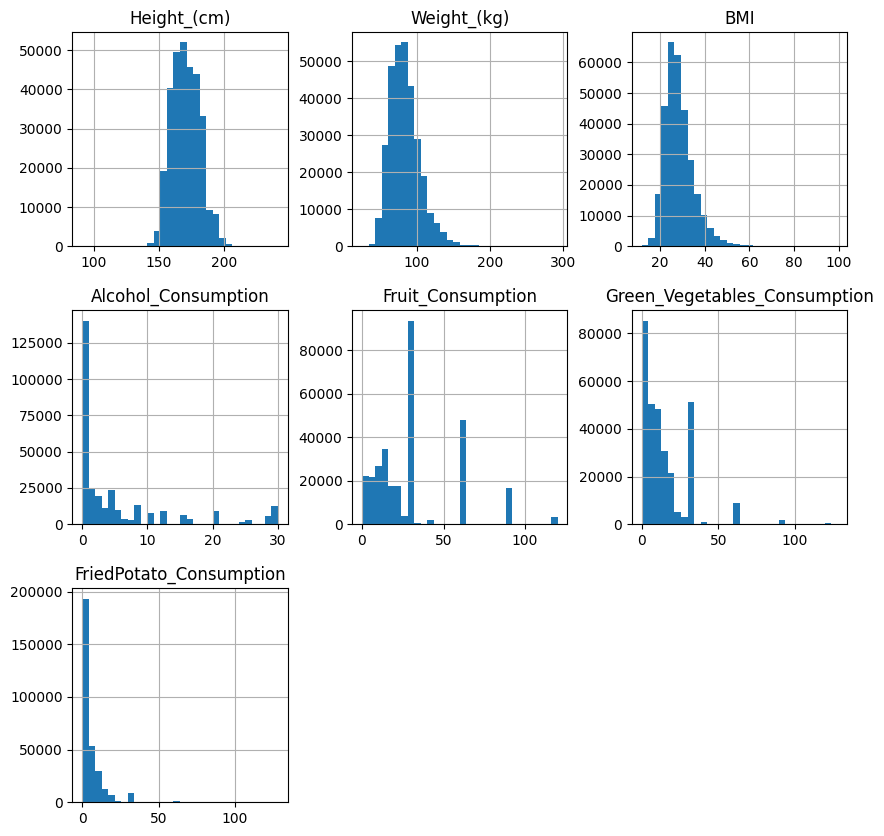

In [12]:
data[numeric_columns].hist(bins=30, figsize=(10, 10))

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('CVD_cleaned.csv')

def encode_categorical(X):
    X_encoded = X.copy()
    for column in X_encoded.columns:
        if X_encoded[column].dtype == 'object':
            le = LabelEncoder()
            X_encoded[column] = le.fit_transform(X_encoded[column])
    return X_encoded

# Prepare data
y = data['Heart_Disease']
X = data.drop('Heart_Disease', axis=1)
X_encoded = encode_categorical(X)

# Escolher método de redução (PCA como exemplo)
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_encoded)

# Criar DataFrame com dados reduzidos
reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
reduced_df['Heart_Disease'] = y

# Salvar
reduced_df.to_csv('CVD_reduced.csv', index=False)

# Mostrar informações
print(f"Dimensões originais: {X.shape}")
print(f"Dimensões após redução: {X_reduced.shape}")
print(f"Variância explicada: {sum(pca.explained_variance_ratio_):.2%}")

Dimensões originais: (308854, 18)
Dimensões após redução: (308854, 5)
Variância explicada: 95.09%
